In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV 

from pprint import pprint
from collections import Counter 

%matplotlib inline

In [2]:
# training and testing dataset
train = pd.read_csv("https://raw.githubusercontent.com/Nikhil-1503/farepredict/master/dataset/train.csv", na_values={"pickup_datetime":"43"})
test = pd.read_csv("https://raw.githubusercontent.com/Nikhil-1503/farepredict/master/dataset/test.csv")

In [3]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
# Checking the number of rows and columns in training and testing data
print("Shape of training data is: ",train.shape) 
print("Shape of test data is: ",test.shape)

Shape of training data is:  (16067, 7)
Shape of test data is:  (9914, 6)


In [6]:
train.dtypes # Datatypes in training dataset

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [7]:
test.dtypes # Datatypes in testing dataset 

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
train.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Analyzing and cleaning the data

In [10]:
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce") # invalid parsing will be set as NaN

In [11]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
train.shape

(16067, 7)

In [13]:
train.dropna(subset= ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [14]:
# Change datatype of pickup_datetime variable to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S UTC")

In [15]:
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [16]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [17]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [18]:
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [19]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [20]:
# Removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
train.shape

(16066, 13)

In [21]:
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [22]:
# Removing maximum count of values greater than 6 (since it is impractical for a cab to have more than 6 passengers)
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [23]:
# Removing values with 0 passengers
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [24]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [25]:
train["passenger_count"].sort_values(ascending= True)

8862     0.12
0        1.00
9790     1.00
9791     1.00
9792     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [26]:
# Removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)

(15934, 13)


In [27]:
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15934, dtype: float64

In [28]:
# Removing negative values for fare_amount
train = train.drop(train[train["fare_amount"] < 0].index, axis=0)
train.shape

(15931, 13)

In [29]:
train["fare_amount"].min()

0.0

In [30]:
# Removing the rows where fare amount is zero
train = train.drop(train[train["fare_amount"] < 1].index, axis=0)
train.shape

(15929, 13)

In [31]:
# Setting the outliers as values greater than 454
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15927, 13)

In [32]:
# Removing the rows for which value of fare_amount is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
train.shape

(15903, 13)

In [33]:
train["fare_amount"].describe()

count    15903.000000
mean        11.376364
std         10.814568
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [34]:
# Pickup latitude and longitude
# Range -
# Latitude -> (-90 to 90)
# Longitude -> (-180 to 180)

# Removing the rows having pickup latitute and longitute out the range
train = train.drop((train[train['pickup_latitude'] < -90]).index, axis=0)
train = train.drop((train[train['pickup_latitude'] > 90]).index, axis=0)

train = train.drop((train[train['pickup_latitude'] < -180]).index, axis=0)
train = train.drop((train[train['pickup_latitude'] > 180]).index, axis=0)

In [35]:
train.shape

(15902, 13)

In [36]:
# Dropoff latitude and longitude
# Range -
# Latitude -> (-90 to 90)
# Longitude -> (-180 to 180)

# Removing the rows having dropoff latitute and longitute out the range
train = train.drop((train[train['dropoff_latitude'] < -90]).index, axis=0)
train = train.drop((train[train['dropoff_latitude'] > 90]).index, axis=0)

train = train.drop((train[train['dropoff_latitude'] < -180]).index, axis=0)
train = train.drop((train[train['dropoff_latitude'] > 180]).index, axis=0)

In [37]:
train.shape

(15902, 13)

In [38]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [39]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [40]:
# Calculating distance in kilometers based on the given coordinates using the haversine formula
# (The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes)

from math import radians, cos, sin, asin, sqrt

def haversine(h):
    lon1=h[0]
    lat1=h[1]
    lon2=h[2]
    lat2=h[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    h = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(h))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [41]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [42]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [43]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [44]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [45]:
train.nunique()

fare_amount            459
pickup_datetime      15857
pickup_longitude     13673
pickup_latitude      14110
dropoff_longitude    13764
dropoff_latitude     14137
passenger_count          8
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15449
dtype: int64

In [46]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [47]:
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8543        0.000000
13929       0.000000
9464        0.000000
10192       0.000000
11907       0.000000
Name: distance, Length: 15902, dtype: float64

In [48]:
# Removing the rows where the distance values are 0 or greater than 130 (the outliers)
train = train.drop(train[train['distance'] == 0].index, axis=0)
train.shape

(15448, 14)

In [49]:
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15425, 14)

In [50]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [51]:
# Removing the unnecessary columns like pickup_datetime, latitude and longitude since we have obtained separate columns based on these fields
drop = ['pickup_datetime', 'pickup_latitude', 'pickup_longitude','dropoff_latitude', 'dropoff_longitude', 'Minute']
train = train.drop(drop, axis = 1)

In [52]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [53]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [54]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [55]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [56]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [57]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Visualization of data
##### Visualizing the relationship between the fare and the number of passengers, day of the ride, pickup date and time, and distance.

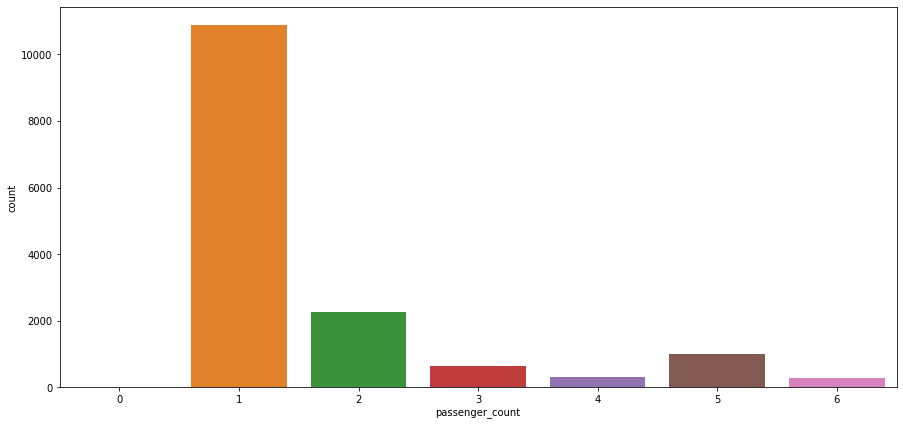

In [58]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

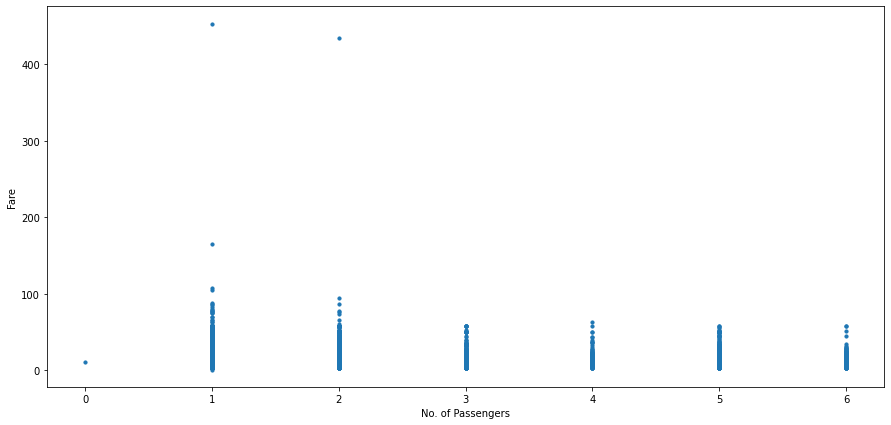

In [59]:
# Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

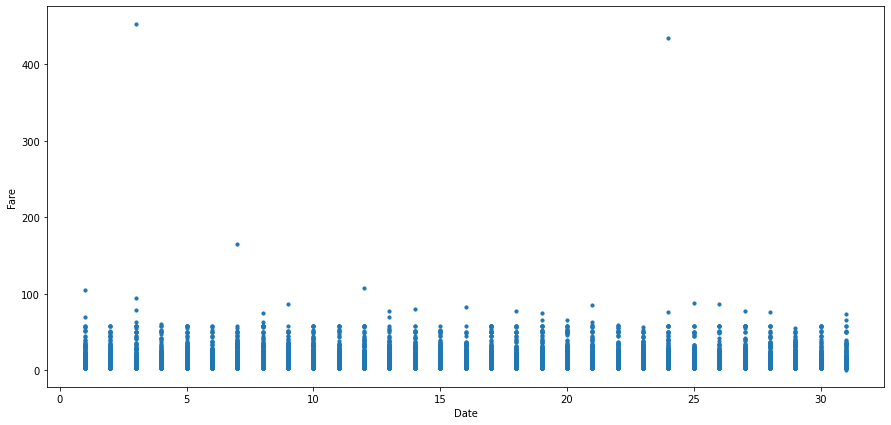

In [60]:
# Relationship between the Date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

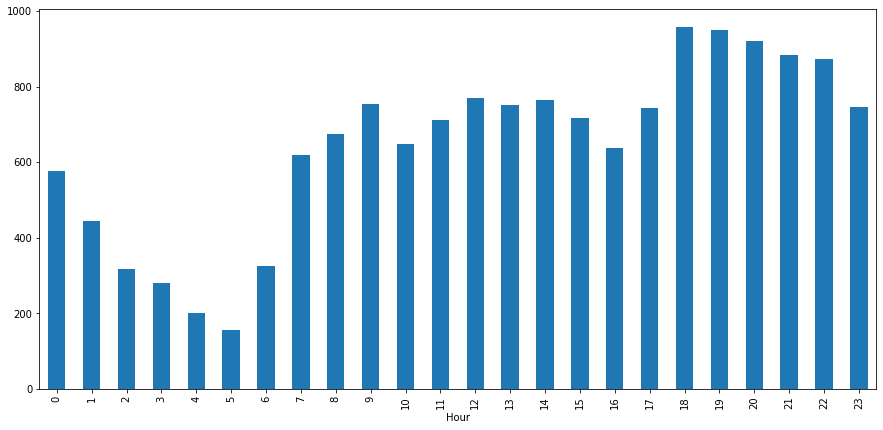

In [61]:
# Count plot on time of journey
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

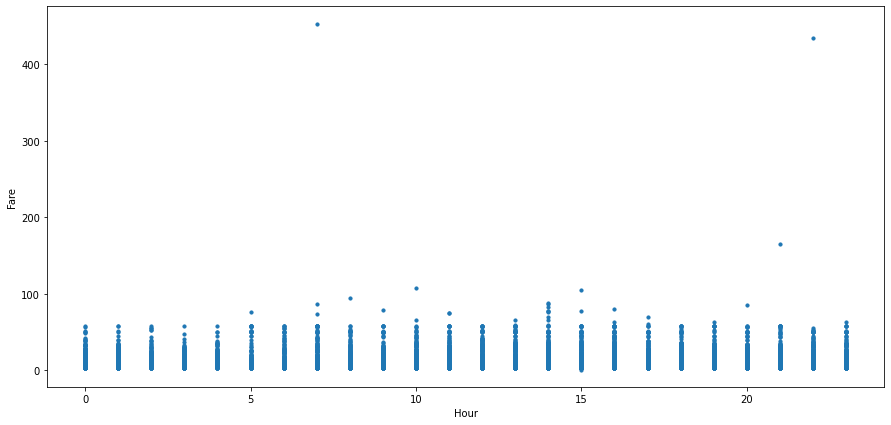

In [62]:
# Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

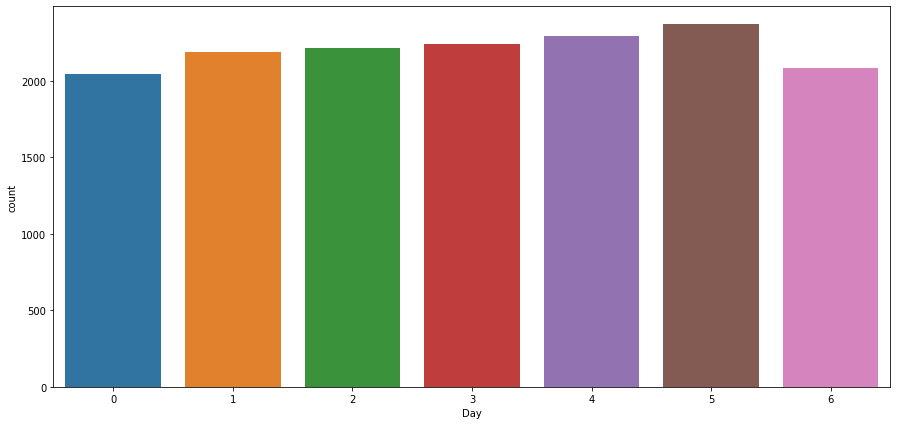

In [63]:
# Count plot on the day of the ride
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

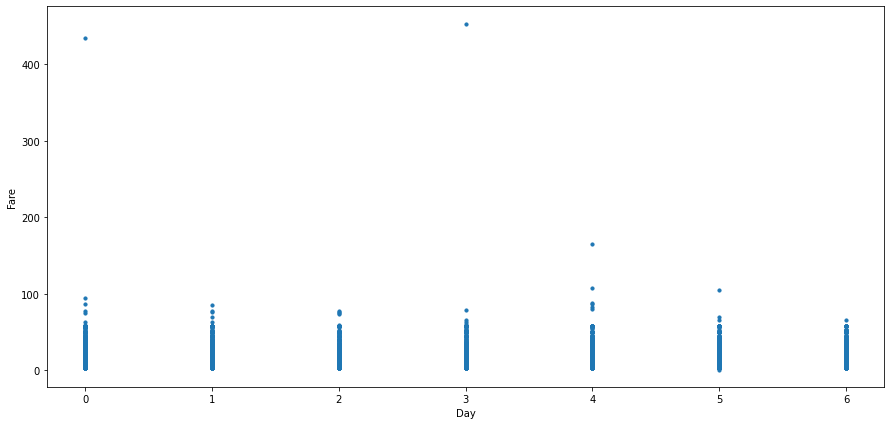

In [64]:
# Relationship between the Day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

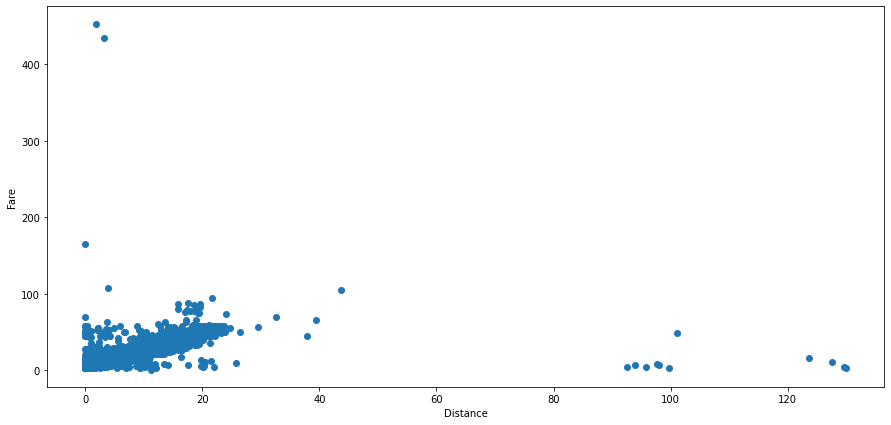

In [67]:
# Relationship between the Distance and Fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

# Feature Scaling

fare_amount


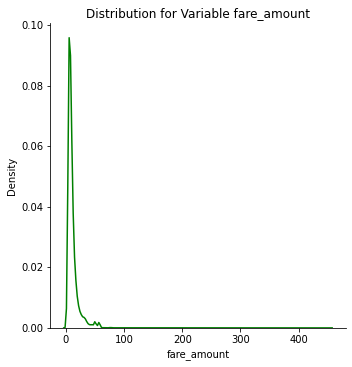

distance


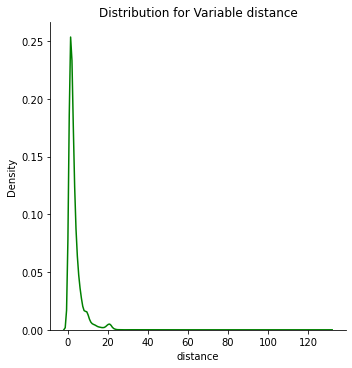

In [72]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.displot(train[i], color='green', kind='kde')
    plt.title("Distribution for Variable "+i)
    plt.show()

In [73]:
# Reducing the skewness by applying log transform
train['fare_amount'] = np.log1p(train['fare_amount'])
train['distance'] = np.log1p(train['distance'])

fare_amount


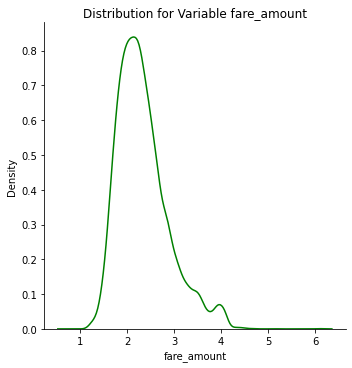

distance


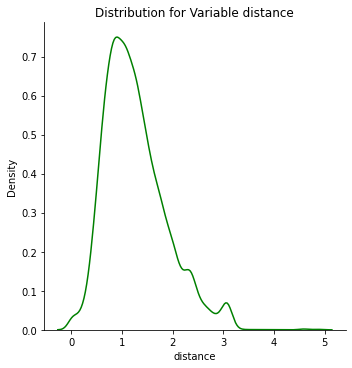

In [74]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.displot(train[i], color='green', kind='kde')
    plt.title("Distribution for Variable "+i)
    plt.show()

##### Bell shaped curve indicates uniformly distributed data, hence there is not requirement of feature scaling

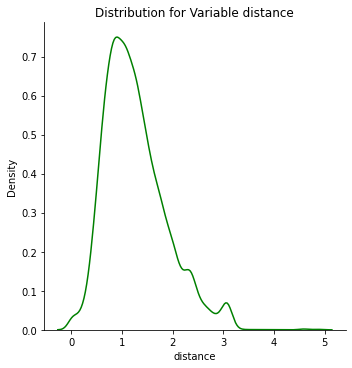

In [75]:
sns.displot(train['distance'], color='green', kind='kde')
plt.title("Distribution for Variable "+i)
plt.show()

In [76]:
# Reducing the skewness
test['distance'] = np.log1p(test['distance'])

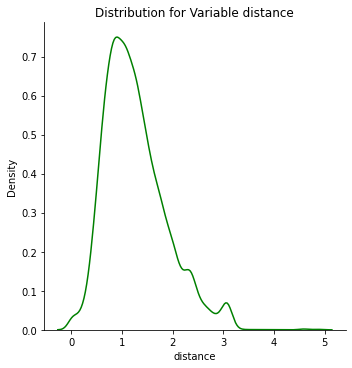

In [77]:
sns.displot(train['distance'], color='green', kind='kde')
plt.title("Distribution for Variable "+i)
plt.show()

# Implementing different models

In [78]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [81]:
X_train.shape

(12340, 7)

In [82]:
X_test.shape

(3085, 7)

## Linear Regression

In [83]:
lr = LinearRegression().fit(X_train , y_train)

In [84]:
train_pred = lr.predict(X_train)

In [85]:
test_pred = lr.predict(X_test)

In [86]:
# calculating RMSE for train and test data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, train_pred))
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, test_pred))

In [87]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.27471204851392067
Root Mean Squared Error For Test data = 0.2480158331388757


In [89]:
# calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, train_pred)

0.7509364602305066

In [90]:
r2_score(y_test, test_pred)

0.7768017819492676

## Decision Tree

In [92]:
dt = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

In [93]:
pred_train_dt = dt.predict(X_train)
pred_test_dt = dt.predict(X_test)

In [95]:
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_dt))
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_dt))

In [96]:
print("Root Mean Squared Error For Training data = " + str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = " + str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.29893955184198767
Root Mean Squared Error For Test data = 0.28865808809632265


In [97]:
r2_score(y_train, pred_train_dt)

0.7050682691891889

In [99]:
r2_score(y_test, pred_test_dt)

0.6976573807760318

## Random Forest

In [100]:
rf = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [101]:
pred_train_RF = rf.predict(X_train)
pred_test_RF = rf.predict(X_test)

In [102]:
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [103]:
print("Root Mean Squared Error For Training data = " + str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = " + str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09473380438114413
Root Mean Squared Error For Test data = 0.2422630391597249


In [104]:
r2_score(y_train, pred_train_RF)

0.9703813883156593

In [105]:
r2_score(y_test, pred_test_RF)

0.7870359821707883

## Gradient Boosting

In [106]:
gb = GradientBoostingRegressor().fit(X_train, y_train)

In [107]:
pred_train_GB = gb.predict(X_train)
pred_test_GB = gb.predict(X_test)

In [108]:
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [109]:
print("Root Mean Squared Error For Training data = " + str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = " + str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.22506372966377702
Root Mean Squared Error For Test data = 0.23156672481988597


In [110]:
r2_score(y_test, pred_test_GB)

0.8054262648406918

In [111]:
r2_score(y_train, pred_train_GB)

0.8328271431135583

# Optimizing the result with parameter tuning

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [113]:
# Random Hyperparameter Grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [114]:
# Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.79.
RMSE =  0.24047309866122787


In [115]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [116]:
# Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  0.2546222214462991


In [117]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 18}
R-squared = 0.79.
RMSE =  0.23943967973135163


In [118]:
# Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.24266815994173763


# Prediction of the fare from provided test dataset

In [119]:
# Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [120]:
predictions_GRF_test_Df

array([2.38001541, 2.40762276, 1.70297472, ..., 4.02250398, 3.02702817,
       2.01441412])

In [121]:
test['Predicted_fare'] = predictions_GRF_test_Df

In [122]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.380015
1,1,2015,1,27,1,13,1.231205,2.407623
2,1,2011,10,8,5,11,0.481579,1.702975
3,1,2012,12,1,5,21,1.085538,2.169424
4,1,2012,12,1,5,21,1.854312,2.688829


In [123]:
test.to_csv('test.csv')